# Publication - Grade Plot

## Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.


###### This dataset contains:
- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic


Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:
- What is the change in the number of crime incidents from 2011 to 2016?
- What were the top 3 crimes per borough in 2016?

###### Before complete this assignment

Please make sure all the task meets expection based on criterias. 

1) Code Review 
All analysist result should be implementing area plots using 'Matplotlib' with relevant data and the use of plots/graphs.
- Area Plot
- Histogram 
- Bar Chart
- Pie Chart
- Box Plot
- Scatter Plot
- Word Clouds
- Folium Maps

Other Code Reviews:
- Prepocessing :Student has been prepocess dataset before applying visualization.
- Code Run Error Free : All codes are working and generated well and correctly.

2) Readiblity
- All cells in Jupyter Notebook well-documented and well-generated by using markdown in every cell using explaination for each code

3) Analysis
All analysist result meets expection which ilucidates information or conclude the result based on plots/graphs. 
- Area Plot
- Histogram 
- Bar Chart
- Pie Chart
- Box Plot
- Scatter Plot
- Overall Analysis

## Running Model

### Exploring Dataset with Pandas

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

The course heavily relies on pandas for data wrangling, analysis, and visualization. We encourage you to spend some time and familizare yourself with the pandas API Reference: http://pandas.pydata.org/pandas-docs/stable/api.html.

###### The first thing we'll do is import two key data analysis modules: pandas and Numpy.

In [1]:
import numpy as np
import pandas as pd

###### read data into pandas using pd.read_csv("name_file") function

In [2]:
df_lnd = pd.read_csv('london_crime_by_lsoa.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# View the top rows of dataset by using the .head() function.


df_lnd.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# View the bottom rows of dataset by using the .tail() function.

df_lnd.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


When analyzing a dataset it's always a good idea to start by getting basic information about dataframe

###### To generate the information, we can using the .info() formula


In [5]:
df_lnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


To get list of column header we can call upon the dataframe's .columns parameter


###### To get columns header by using .columns.value parameter.

In [6]:
df_lnd.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
df_lnd.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

######  To view the dimensions of the dataframe, we use the .shape parameter

In [8]:
df_lnd.shape

(13490604, 7)

In [9]:
# make sure the data series doesn't contain any missing value by using .isnull() formula

df_lnd.isnull()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13490599,False,False,False,False,False,False,False
13490600,False,False,False,False,False,False,False
13490601,False,False,False,False,False,False,False
13490602,False,False,False,False,False,False,False


#### Now, we are going to make one dataset that contains value 1 in value features

In [10]:
criminal = df_lnd[df_lnd['value']==1]
criminal

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490566,E01000738,Bromley,Burglary,Burglary in a Dwelling,1,2009,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


So, all data set has been named as criminal that consist of 2141789 rows and 7 columns

### Visualizing Data using Matplotlib
### Matplotlib : Standard Python Visualization Library

The primary plotting library we will explore in the course is Matplotlib. As mentioned on their website:

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

### Matplotlib.Pyplot
One of the core aspects of Matplotlib is matplotlib.pyplot. matplotlib.pyplot is a collection of command-style functions that make Matplotlib work like MATLAB. Each pyplot function makes some changes to the drawing: for example, create a picture, create a plot area in the picture, plot multiple lines in the plotting area, decorate the plot with labels, etc. In this session, we will work with scripting layers to learn how to create line plots.

#### Now,lets begin with importing matplotlib and matplotlib.pyplot as follows:

In [11]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
# optional: check if Matplotlib is loaded.

mpl.__version__

'3.3.4'

In [13]:
# optional : apply a style to Matplotlib, eg: using ggplot-like style

mpl.style.use(['ggplot'])


## Area Plots 
###### What is a line plot and why use it?

An Area chart or area plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

###### Questions:

Mencari tren Theft and Handling, diatas atau sama dengan tahun 2011 diikuti dengan tindak kriminal

In [14]:
# list of major_category

df_lnd['major_category'].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [15]:
#get the data up to 2011

df_up2011 = df_lnd[(df_lnd['value']==1) & (df_lnd['year']>=2011) & (df_lnd['major_category']=='Theft and Handling') ]
df_up2011.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
62,E01002977,Kingston upon Thames,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,3
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
155,E01003849,Richmond upon Thames,Theft and Handling,Theft From Motor Vehicle,1,2011,8


In [16]:
# define total cases in major category of criminalization each year

df_major = df_up2011.groupby(['year'])['major_category'].value_counts()
df_major.head()

year  major_category    
2011  Theft and Handling    74065
2012  Theft and Handling    74317
2013  Theft and Handling    72411
2014  Theft and Handling    73009
2015  Theft and Handling    74252
Name: major_category, dtype: int64

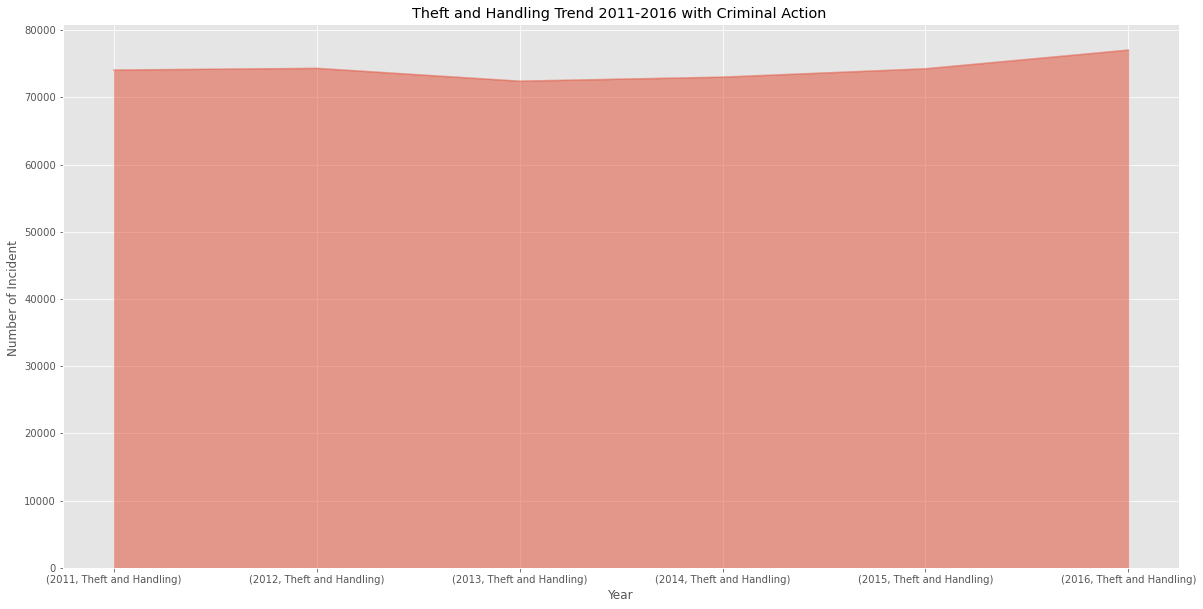

In [17]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df_major.plot(kind='area', 
             alpha=0.5, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10), # pass a tuple (x,y) size
            )
# Graded-Funtion End

plt.title('Theft and Handling Trend 2011-2016 with Criminal Action ') # add a title to the area plot
plt.ylabel('Number of Incident ') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

###### Insight:

Apabila dilihat, tren theft and handling dengan tindak kriminal dari tahun 2011 hingga 2016 tidak pernah terjadi penurunan signifikan kasus selalu berada diangka 70.000an keatas.

## Histogram
A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


###### Questions:
Melihat frequency tindak kejahatan dengan major category Theft and Handling di tahun 2016 disertai dengan tindak kriminal (value = 1)



In [18]:
# let's quickly view the 2016 data
df_hist = df_lnd[(df_lnd['value']==1) & (df_lnd['year']==2016) & (df_lnd['major_category']=='Theft and Handling')]
df_hist.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
349,E01033463,Brent,Theft and Handling,Other Theft Person,1,2016,12
383,E01001898,Hammersmith and Fulham,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2016,12
1109,E01000713,Bromley,Theft and Handling,Other Theft,1,2016,12
1215,E01002448,Hillingdon,Theft and Handling,Theft From Motor Vehicle,1,2016,5


In [19]:
# Let's view total .sum() by group in month

df_hist1 = df_hist.groupby(['month'])['value'].sum()
df_hist1.head()

month
1    6174
2    6186
3    6486
4    6276
5    6594
Name: value, dtype: int64

In [20]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_hist1)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[2 0 1 1 1 2 3 0 1 1]
[6174.  6223.9 6273.8 6323.7 6373.6 6423.5 6473.4 6523.3 6573.2 6623.1
 6673. ]


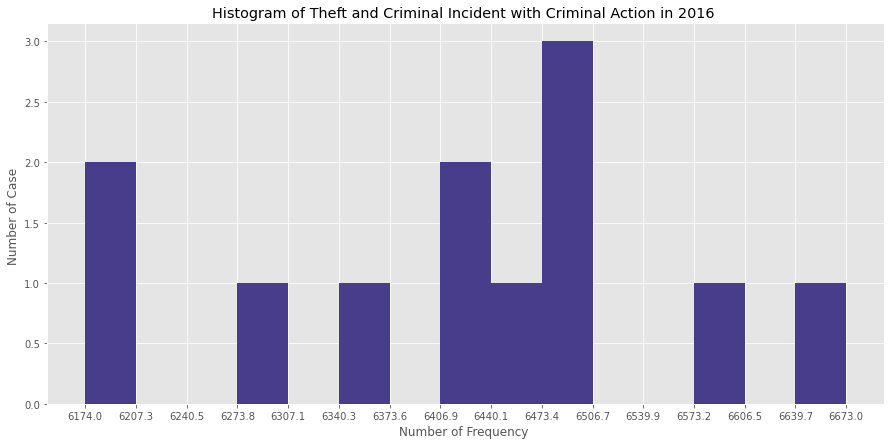

In [21]:
# Write your function below
count, bin_edges = np.histogram(df_hist1,15)
# Graded-Funtion Begin (~2 Lines)
df_hist1.plot(kind ='hist', 
          figsize=(15, 7),
          bins=15,
          alpha=1,
          xticks=bin_edges,
          color=['darkslateblue']
         )
# Graded-Funtion End

plt.title('Histogram of Theft and Criminal Incident with Criminal Action in 2016 ') # add a title to the histogram
plt.ylabel('Number of Case ') # add y-label
plt.xlabel('Number of Frequency ') # add x-label

plt.show()

###### Insight:

Sumbu Y mewakili jumlah kasus yang berkontribusi atas jumlah frekuensi.

Pada sumbu X menunjukkan kisaran frekuensi dalam interval 6174 - 6673.
- apabila dilihat kejadian theft and handling disertai dengan tindakan kriminal pada tahun 2016 terjadi di angka 6000an kasus, dengan kasus paling rendah 6174 dan paling tinggi 6673.




## Bar Chart

A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

- kind=bar creates a vertical bar plot
- kind=barh creates a horizontal bar plot

###### Questions:
Mencari total tingkat kejahatan kecil ('minor category) di London berdasarkan tahun 2008 - 2016

In [22]:
new_df= pd.DataFrame(df_lnd, columns = ['minor_category','year','value'])
new_df.head()

,minor_category,year,value
0,Burglary in Other Buildings,2016,0
1,Other violence,2016,0
2,Other violence,2015,0
3,Burglary in Other Buildings,2016,0
4,Personal Property,2008,0


In [23]:
df_grBy_Min_Cat = new_df.groupby(['minor_category'])['value'].sum()
df_grBy_Min_Cat.head()

minor_category
Assault with Injury            451001
Burglary in Other Buildings    263011
Burglary in a Dwelling         491282
Business Property               21295
Common Assault                 413690
Name: value, dtype: int64

In [24]:
df_grBy_Year = new_df.groupby(['year'])['value'].sum()
df_grBy_Year.head()

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
Name: value, dtype: int64

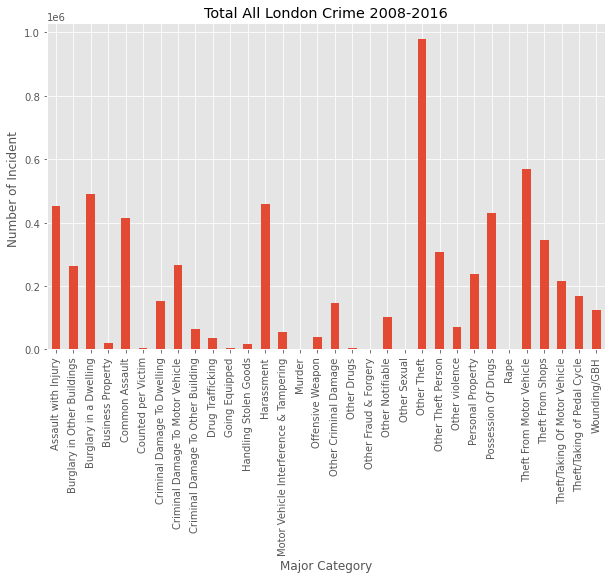

In [25]:
# Write your function below
df_grBy_Min_Cat.plot(kind='bar', figsize=(10, 6))
# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

plt.xlabel('Major Category') # add to x-label to the plot
plt.ylabel('Number of Incident ') # add y-label to the plot
plt.title('Total All London Crime 2008-2016') # add title to the plot

plt.show()

###### Insight:
Tingkat kejahatan minor tertinggi di London didominasi oleh Other Theft diikuti dengan Theft From Motor Vehicle, dan Harassment. 

Tak hanya kasus kejahatan kategori major yang perlu di waspadahi, namun untuk kategori tindakan kejahatan minor yang didominasi oleh Therft harus dilakukan pengawasan ketat terutama di lokasi London yang rawan akan pencurian. 

## Pie Chart
A pie chart is a circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the kind=pie keyword.


###### Questions:
Mencari total tingkat kejahatan yang paling besar di London berdasarkan tahun 2011 - 2016

In [26]:
df_Maj= pd.DataFrame(df_lnd, columns = ['major_category','year','value'])
df_Maj.head()

,major_category,year,value
0,Burglary,2016,0
1,Violence Against the Person,2016,0
2,Violence Against the Person,2015,0
3,Burglary,2016,0
4,Robbery,2008,0


In [27]:
df_grBy_Maj_Cat = df_Maj.groupby(['major_category'])['value'].sum()
df_grBy_Maj_Cat.head()

major_category
Burglary                     754293
Criminal Damage              630938
Drugs                        470765
Fraud or Forgery               5325
Other Notifiable Offences    106349
Name: value, dtype: int64

In [28]:
# group major category and apply sum() function
df_major = df_lnd.groupby('major_category', axis=0).sum()

# note : the output of the gropuby method is a 'groupby' object.
# we can not use it further untill we apply a function (eg:.sum())

print(type(df_lnd.groupby('major_category',axis=0)))

df_major

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


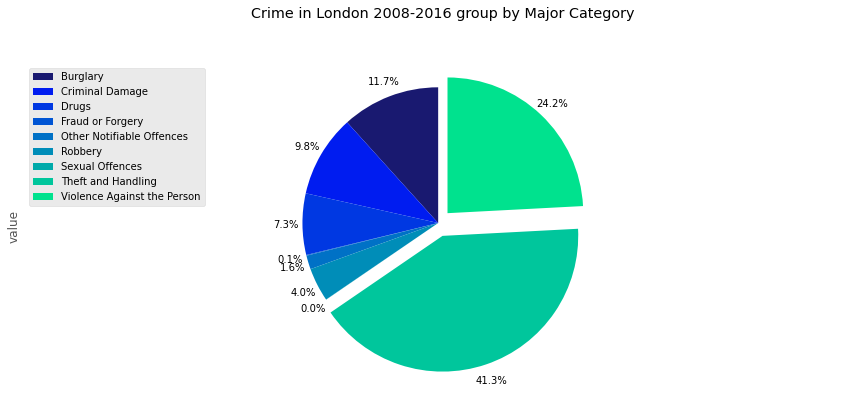

In [29]:
# Write your function below
colors_list = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80' ]

# ratio for each continent with which to offset each wedge.
explode_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.1, 0.1]

# Graded-Funtion Begin (~8 Lines)
df_grBy_Maj_Cat.plot(kind='pie',
                      figsize=(15, 6),
                      autopct='%1.1f%%',       # add in percetages
                      startangle=90,           # start angle 90 deg 
                      shadow=False,            # able/disable shadow
                      labels=None,             # turn off labels on pie chart
                      # the ratio between the center of each pie slice and the start of the text generated by autopct
                      pctdistance=1.12,
                      colors=colors_list,
                      explode=explode_list      # 'explode'
                      )
# Graded-Funtion End

# scale the title up by 12% to match pctdistance
plt.title('Crime in London 2008-2016 group by Major Category', y=1.12)

plt.axis('equal')


# add legend
plt.legend(labels=df_grBy_Maj_Cat.index, loc='upper left')

plt.show()

###### Insight:
Tingkat kejahatan major tertinggi sepanjang tahun 2008-2016 adalah theft and handling diikuti dengan Violence against the Person, tindak kejahatan yang paling rendah adalah sexual offences.

sehingga perlu meningkatkan level pengawasan untuk kedua tindakan kejahatan kategori major tersebut.

## Box Chart
A box plot is a way of statistically representing the distribution of the data through five main dimensions:

- Minimun: Smallest number in the dataset.
- First quartile: Middle number between the minimum and the median.
- Second quartile (Median): Middle number of the (sorted) dataset.
- Third quartile: Middle number between median and maximum.
- Maximum: Highest number in the dataset.
    
###### Questions:
Melihat kejadian Theft and Handling pada tahun 2016 yang disertai dengan tindakan kriminal

In [30]:
df_hist1.describe()

count      12.000000
mean     6419.500000
std       150.014848
min      6174.000000
25%      6348.000000
50%      6443.500000
75%      6488.500000
max      6673.000000
Name: value, dtype: float64

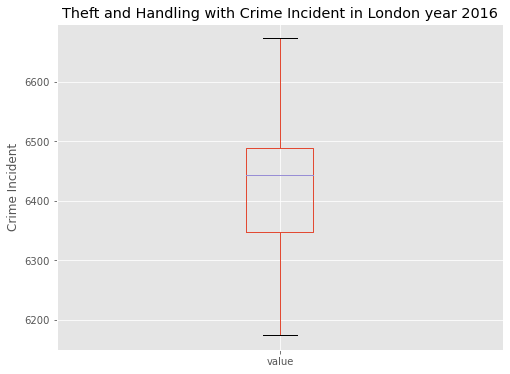

In [31]:
# Write your function below
df_hist1.plot(kind='box', figsize=(8, 6))

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

plt.title('Theft and Handling with Crime Incident in London year 2016')
plt.ylabel('Crime Incident')

plt.show()

###### Insight:
Tindakan kriminal di London memiliki median di 6443.5, untuk insiden theft and handling disertai dengan kriminal pernah angka paling tinggi sebesar 6673 insiden dan paling rendah 6174

## Scatter Chart
A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the datapoints are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.
    
###### Questions:
Melihat semua tindakan kriminal di London sepanjang tahun 2018-2016

In [32]:
df_tot = df_lnd[['year', 'value']].groupby(['year'], as_index= True).sum()
df_tot.head()

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329


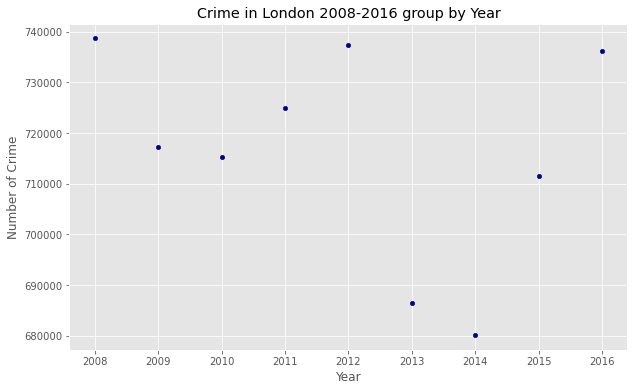

In [33]:
# Write your function below
df_tot.reset_index(inplace = True)

# view the final dataframe
# Graded-Funtion Begin (~1 Lines)
df_tot.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkblue')
# Graded-Funtion End

plt.title('Crime in London 2008-2016 group by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crime')

#plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
#plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

###### Insight:
Apabila dilihat, tidak ada tren negatif atau positif untuk kasus kriminal di London, tetapi pada tahun-tahun tertentu terjadi tindak criminal dengan angka cukup tinggi (2008, 2012 & 2016), dan pernah mengalami tindak kriminal dengan angka rendah (2013 & 2014)

## Word Clouds
Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.
    
###### Questions:
Melihat tindakan kriminal di London sepanjang tahun 2018-2016 yang sering muncul pada dataset

In [34]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

#!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [35]:
stopwords = set(STOPWORDS)
from PIL import Image

In [36]:
new_bor= pd.DataFrame(df_lnd, columns = ['borough', 'major_category','year','value'])
#new_bor.value.reset_index(inplace=True)
new_bor.head()

,borough,major_category,year,value
0,Croydon,Burglary,2016,0
1,Greenwich,Violence Against the Person,2016,0
2,Bromley,Violence Against the Person,2015,0
3,Redbridge,Burglary,2016,0
4,Wandsworth,Robbery,2008,0


In [37]:
df_newbor = new_bor[['borough', 'value']].groupby(['borough'], as_index= True).sum()
df_newbor.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


In [38]:
total_incident = new_bor['value'].sum()
total_incident

6447758

In [39]:
max_words = 100
word_string = ''
for borough in df_newbor.index.values:
    # check if country's name is a single-word name
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(df_newbor.loc[borough, 'value']/float(total_incident)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Southwark Sutton Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

In [40]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


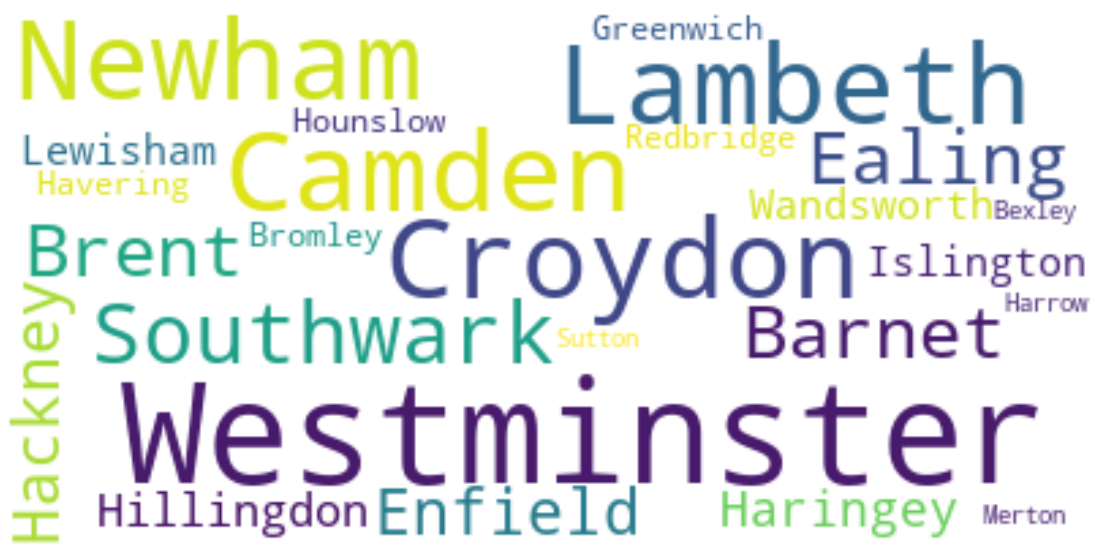

In [41]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###### Insight:
Hasil analisa pada cloud diatas menunjukan bahwa Westinster adalah kata yang paling seing muncul dalam data series

## Folium
Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

###### Questions:
Melihat sebaran lokasi sesuai tindakan kriminal di London sepanjang tahun 2018-2016

In [42]:

#!conda install -c conda-forge folium=0.5.0 --yes
#!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [43]:
# download and read dataframe into pandas
df_incidents = pd.read_csv('london_crime_by_lsoa.csv')

# view dataset
df_incidents.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [44]:
# get the first 100 crimes in the df_incidents dataframe

limit = 100
df_incidents = df_incidents.iloc[0:limit,:]

df_incidents

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
95,E01002093,Haringey,Violence Against the Person,Harassment,1,2012,3
96,E01002374,Havering,Robbery,Personal Property,0,2009,8
97,E01004142,Sutton,Burglary,Burglary in Other Buildings,3,2013,5
98,E01000401,Bexley,Violence Against the Person,Wounding/GBH,0,2011,4


In [45]:
# London latitude and longitude values

latitude = 51.50853
longitudes = -0.12574

In [46]:
# create map and display it
london_map = folium.Map(location=[latitude,longitudes],zoom_start=12)

#display world map
london_map

##### Insight:

Pada gambar maps diatas merupakan area London 

## Review Data Analysis
- Area Plot


    Q:Mencari tren Theft and Handling, diatas atau sama dengan tahun 2011 diikuti dengan tindak kriminal
    
    A:Trend Threft & Handling dari tahun 2011 - 2016 cukup stabil dan cenderung meningkat

- Histogram


    Q:Melihat frequency tindak kejahatan dengan major category Theft and Handling di tahun 2016 disertai dengan tindak kriminal (value = 1)
    
    A:Kejadian theft and handling disertai dengan tindakan kriminal pada tahun 2016 terjadi di angka 6000an kasus, dengann kasus paling rendah 6174 dan paling tinggi 6673

- Bar Chart


    Q:Mencari total tingkat kejahatan kecil ('minor category) di London berdasarkan tahun 2008 - 2016 
    
    A:Tingkat kejahatan minor tertinggi di London didominasi oleh Other Theft diikuti dengan Theft From Motor Vehicle, dan Harassment. 
    Tak hanya kasus kejahatan kategori major yang perlu di waspadahi, namun untuk kategori tindakan kejahatan minor yang didominasi oleh Therft harus dilakukan pengawasan ketat terutama di lokasi London yang rawan akan pencurian. 

- Pie Chart


    Q:Mencari total tingkat kejahatan di London berdasarkan tahun
    
    A:Tingkat kejahatan major tertinggi sepanjang tahun 2008-2016 adalah theft and handling diikuti dengan Violence against the Person, tindak kejahatan yang paling rendah adalah sexual offences. Sehingga perlu meningkatkan level pengawasan untuk kedua tindakan kejahatan kategori major tersebut.

- Box Chart


    Q:Melihat kejadian Theft and Handling pada tahun 2016 yang disertai dengan tindakan kriminal

    A:Tindakan kriminal Thref and Handling di London memiliki median di 6443.5, untuk insiden theft and handling disertai dengan kriminal pernah angka paling tinggi sebesar 6673 insiden dan paling rendah 6174

- Scatter Plot


    Q: Melihat semua tindakan kriminal di London sepanjang tahun 2018-2016
    
    A: Tidak ada tren negatif atau positif untuk kasus kriminal di London, tetapi pada tahun-tahun tertentu terjadi tindak criminal dengan angka cukup tinggi (2008, 2012 & 2016), dan pernah mengalami tindak kriminal dengan angka rendah (2013 & 2014)

- Word Cloud


    Q: Melihat kalimat yang sering muncul pada index 'borough'
    
    A: Westminister adalah salah satu index pada borough yang paling sering muncul pada data series

- Folium Maps


    Q: Menampilkan visual maps London

    A: Telah ditampilkan visual maps dengan titik koordinat London adalah [51.50853,-0.12574]